# DAY 4: Understanding the Core Engine Behind Agents: How Large Language Models Think
## Lab 1: Visualizing Tokenization and Embeddings
### Goal: Understand how text is broken into tokens and converted into embeddings (numerical vectors). Learn to visualize and interpret these structures.
- Estimated Time: 90–120 minutes
- Deliverable: Notebook/plots showing token breakdown and a 2D embedding visualization.

In [1]:
# Install libraries:

!pip install openai tiktoken matplotlib scikit-learn

  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 2.1 MB/s  0:00:03m 2.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 3.7 MB/s  0:00:02m 3.7 MB/s eta 0:00:01
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.4 MB/s  0:00:00m 5.4 MB/s eta 0:00:01
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 8.5 MB/s  0:00:02 eta 0:00:010:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [matplotlib]0m  

### Step 2. Inspect Tokenization
- Use tiktoken (OpenAI’s tokenizer)

In [2]:
import tiktoken
 
enc = tiktoken.encoding_for_model("gpt-4o-mini")
 
sample_text = "Agentic AI agents can plan, reason, and use tools."
tokens = enc.encode(sample_text)
 
print("Original text:", sample_text)
print("Number of tokens:", len(tokens))
print("Token IDs:", tokens)
print("Decoded tokens:", [enc.decode([t]) for t in tokens])

# Try different texts: long sentences, code snippets, emojis.
# Observe how punctuation, spaces, and symbols affect token count.

Original text: Agentic AI agents can plan, reason, and use tools.
Number of tokens: 13
Token IDs: [18086, 291, 20837, 19297, 665, 3496, 11, 5207, 11, 326, 1199, 8437, 13]
Decoded tokens: ['Agent', 'ic', ' AI', ' agents', ' can', ' plan', ',', ' reason', ',', ' and', ' use', ' tools', '.']


### 3. Compare Token Length Across Texts
- Note how shorthand, abbreviations, or emojis impact tokens

In [5]:
sentences = [
    "AI is amazing.",
    "Artificial Intelligence is amazing.",
    "AI is 🔥."
]
 
for s in sentences:
    t = enc.encode(s)
    print(f"Text: {s}\nTokens: {len(t)} → {t}\n")

Text: AI is amazing.
Tokens: 4 → [17527, 382, 8467, 13]

Text: Artificial Intelligence is amazing.
Tokens: 5 → [186671, 42378, 382, 8467, 13]

Text: AI is 🔥.
Tokens: 5 → [17527, 382, 113718, 98, 13]



### Step 4. Generate Embeddings
- Use OpenAI embeddings:

In [6]:
import os
from dotenv import load_dotenv
from openai import OpenAI
load_dotenv()
 
client = OpenAI()
 
texts = ["Agentic AI", "Autonomous agents", "Bananas are yellow"]
 
embeddings = []
for t in texts:
    resp = client.embeddings.create(
        model="text-embedding-3-small",
        input=t
    )
    vector = resp.data[0].embedding
    embeddings.append(vector)
    print(f"{t} → vector length {len(vector)}")
    
# Notice embedding dimensions (e.g., 1536).

Agentic AI → vector length 1536
Autonomous agents → vector length 1536
Bananas are yellow → vector length 1536


### Step 5. Dimensionality Reduction & Plotting (25 min)
- Visualize embeddings in 2D space:

Matplotlib is building the font cache; this may take a moment.


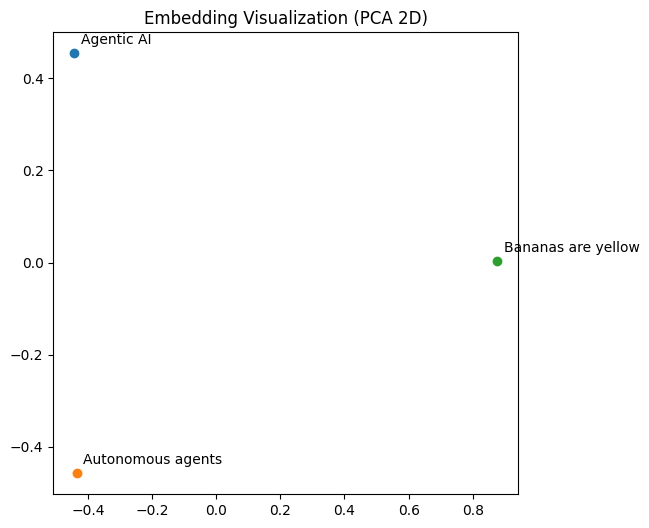

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2)
points = pca.fit_transform(embeddings)
 
plt.figure(figsize=(6,6))
for i, txt in enumerate(texts):
    plt.scatter(points[i,0], points[i,1])
    plt.text(points[i,0]+0.02, points[i,1]+0.02, txt)
 
plt.title("Embedding Visualization (PCA 2D)")
plt.show()

# Add more sentences and observe clusters.
# Try semantically similar phrases vs unrelated ones.

### Step 6. Experiment with Semantic Similarity (15 min)
- Compute cosine similarity:

In [10]:
# Compute cosine similarity:

from sklearn.metrics.pairwise import cosine_similarity
 
sim = cosine_similarity([embeddings[0]], embeddings)
print("Similarity scores:", sim)

# Compare "Agentic AI" vs "Autonomous agents" vs "Bananas are yellow".
# Similar texts should yield higher similarity scores.

Similarity scores: [[1.         0.58418607 0.02983828]]


### Step 7. Mini-Project: Token & Embedding Explorer (15–20 min)
- Write a small function:
- Input: a sentence.

- Output: tokens + embedding + similarity vs a reference.
- Test with multiple sentences and visualize clusters again.

- By finishing this lab, you’ll see how raw text becomes numbers via tokenization and embeddings: 
— the foundation of LLM reasoning and semantic search / RAG pipelines.